# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 52ms/step - loss: 0.0615 - val_loss: 0.0086
Epoch 2/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0098 - val_loss: 0.0046
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 1s 34ms/step - loss: 8.4240e-04 - val_loss: 6.6916e-04
Epoch 5/100
20/20 [==============================] - 1s 34ms/step - loss: 7.5072e-04 - val_loss: 5.8465e-04
Epoch 6/100
20/20 [==============================] - 1s 34ms/step - loss: 7.0807e-04 - val_loss: 5.5410e-04
Epoch 7/100
20/20 [==============================] - 1s 34ms/step - loss: 6.6869e-04 - val_loss: 5.3219e-04
Epoch 8/100
20/20 [==============================] - 1s 34ms/step - loss: 6.4661e-04 - val_loss: 5.1210e-04
Epoch 9/100
20/20 [==============================] - 1s 34ms/step - loss: 6.3475e-04 - val_loss: 4.9891e-04
Epoch 10/100
20/20 [==============================] 

In [10]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 7ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.0007127428279947
RMSE: 1196.2464625804887
MAE: 792.3703552631578


In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

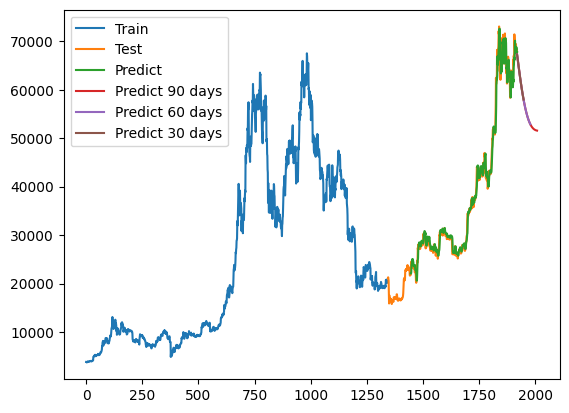

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [32]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [35]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 44ms/step - loss: 0.0355 - val_loss: 0.0030
Epoch 2/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0042 - val_loss: 5.8471e-04
Epoch 3/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0011 - val_loss: 5.8930e-04
Epoch 4/100
20/20 [==============================] - 1s 29ms/step - loss: 8.1154e-04 - val_loss: 5.1138e-04
Epoch 5/100
20/20 [==============================] - 1s 29ms/step - loss: 7.5598e-04 - val_loss: 4.7414e-04
Epoch 6/100
20/20 [==============================] - 1s 29ms/step - loss: 7.3941e-04 - val_loss: 5.0702e-04
Epoch 7/100
20/20 [==============================] - 1s 29ms/step - loss: 7.0111e-04 - val_loss: 4.3333e-04
Epoch 8/100
20/20 [==============================] - 1s 30ms/step - loss: 6.7952e-04 - val_loss: 4.0090e-04
Epoch 9/100
20/20 [==============================] - 1s 29ms/step - loss: 6.6250e-04 - val_loss: 3.7333e-04
Epoch 10/100
20/20 [========================

In [40]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [41]:
y_pred=scaler.inverse_transform(y_pred)

In [42]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.9169269518471703
RMSE: 73.28419189737427
MAE: 45.644404481907884


In [44]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

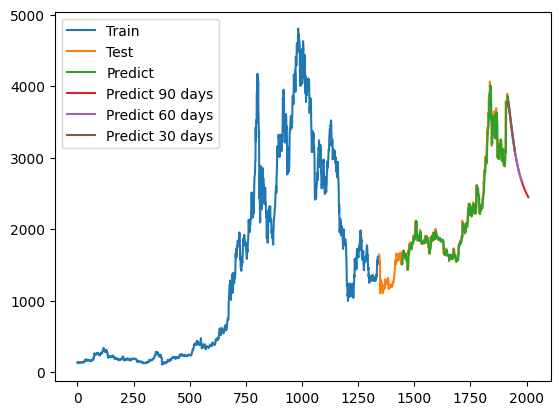

In [45]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [79]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [80]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [81]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [82]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [85]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 44ms/step - loss: 0.0288 - val_loss: 0.0017
Epoch 2/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0027 - val_loss: 6.9879e-04
Epoch 3/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0011 - val_loss: 6.5927e-04
Epoch 4/100
20/20 [==============================] - 1s 28ms/step - loss: 9.3859e-04 - val_loss: 5.0288e-04
Epoch 5/100
20/20 [==============================] - 1s 28ms/step - loss: 8.5793e-04 - val_loss: 4.2722e-04
Epoch 6/100
20/20 [==============================] - 1s 28ms/step - loss: 8.2404e-04 - val_loss: 4.2044e-04
Epoch 7/100
20/20 [==============================] - 1s 29ms/step - loss: 8.0491e-04 - val_loss: 4.0853e-04
Epoch 8/100
20/20 [==============================] - 1s 29ms/step - loss: 7.8304e-04 - val_loss: 3.9190e-04
Epoch 9/100
20/20 [==============================] - 1s 28ms/step - loss: 7.5404e-04 - val_loss: 3.8018e-04
Epoch 10/100
20/20 [========================

In [87]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 5ms/step


In [88]:
y_pred=scaler.inverse_transform(y_pred)

In [89]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.8229684276894933
RMSE: 11.227673773540712
MAE: 6.580711657072369


In [91]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

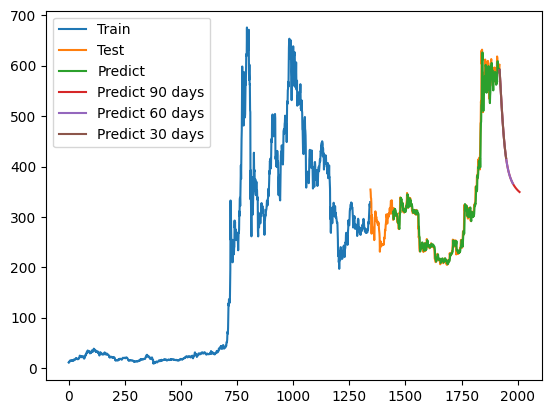

In [92]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [94]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [95]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [96]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [97]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [98]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [99]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [100]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [101]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 3s 40ms/step - loss: 0.0387 - val_loss: 0.0054
Epoch 2/100
23/23 [==============================] - 1s 27ms/step - loss: 0.0054 - val_loss: 8.4804e-04
Epoch 3/100
23/23 [==============================] - 1s 28ms/step - loss: 8.2312e-04 - val_loss: 8.3357e-04
Epoch 4/100
23/23 [==============================] - 1s 28ms/step - loss: 5.6087e-04 - val_loss: 7.0997e-04
Epoch 5/100
23/23 [==============================] - 1s 28ms/step - loss: 5.1734e-04 - val_loss: 6.6051e-04
Epoch 6/100
23/23 [==============================] - 1s 28ms/step - loss: 4.9971e-04 - val_loss: 6.7988e-04
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 4.7889e-04 - val_loss: 6.3301e-04
Epoch 8/100
23/23 [==============================] - 1s 27ms/step - loss: 4.6707e-04 - val_loss: 5.8826e-04
Epoch 9/100
23/23 [==============================] - 1s 27ms/step - loss: 4.6005e-04 - val_loss: 5.7337e-04
Epoch 10/100
23/23 [====================

In [102]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [103]:
y_pred=scaler.inverse_transform(y_pred)

In [104]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.9303729215191232
RMSE: 1406.6366283289822
MAE: 942.987106614399


In [108]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

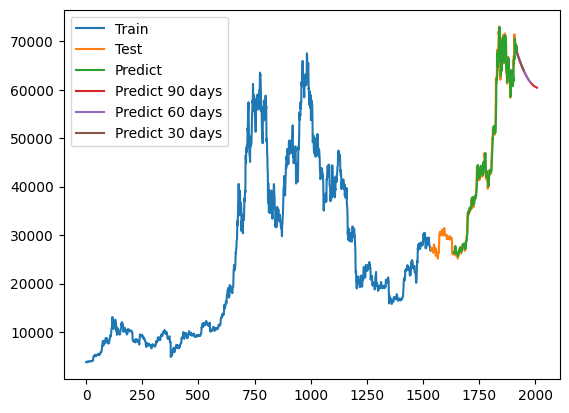

In [109]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [126]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [127]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [128]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [129]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [130]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [131]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [132]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [133]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 41ms/step - loss: 0.0433 - val_loss: 0.0027
Epoch 2/100
23/23 [==============================] - 1s 28ms/step - loss: 0.0045 - val_loss: 7.6759e-04
Epoch 3/100
23/23 [==============================] - 1s 27ms/step - loss: 9.5399e-04 - val_loss: 6.7210e-04
Epoch 4/100
23/23 [==============================] - 1s 31ms/step - loss: 7.0652e-04 - val_loss: 7.0644e-04
Epoch 5/100
23/23 [==============================] - 1s 28ms/step - loss: 6.5674e-04 - val_loss: 6.0081e-04
Epoch 6/100
23/23 [==============================] - 1s 27ms/step - loss: 6.4951e-04 - val_loss: 5.9759e-04
Epoch 7/100
23/23 [==============================] - 1s 27ms/step - loss: 6.2585e-04 - val_loss: 5.9534e-04
Epoch 8/100
23/23 [==============================] - 1s 28ms/step - loss: 6.1585e-04 - val_loss: 6.1921e-04
Epoch 9/100
23/23 [==============================] - 1s 27ms/step - loss: 5.9602e-04 - val_loss: 6.7911e-04
Epoch 10/100
23/23 [====================

In [134]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [135]:
y_pred=scaler.inverse_transform(y_pred)

In [136]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.2193293028482093
RMSE: 91.22104436123193
MAE: 59.68805503602582


In [138]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

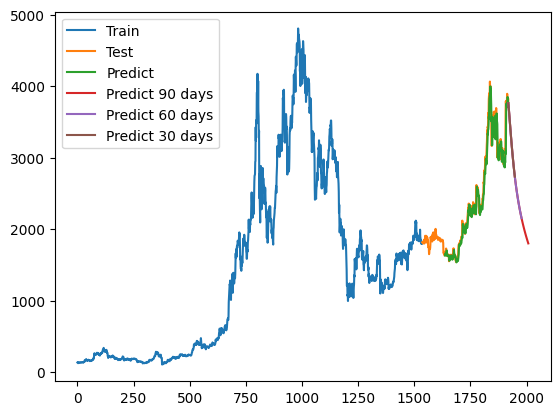

In [139]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [141]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [142]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [143]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [144]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [145]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [146]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [147]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [148]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 3s 42ms/step - loss: 0.0268 - val_loss: 0.0044
Epoch 2/100
23/23 [==============================] - 1s 28ms/step - loss: 0.0024 - val_loss: 8.3531e-04
Epoch 3/100
23/23 [==============================] - 1s 28ms/step - loss: 9.6375e-04 - val_loss: 6.6761e-04
Epoch 4/100
23/23 [==============================] - 1s 29ms/step - loss: 8.5390e-04 - val_loss: 6.0803e-04
Epoch 5/100
23/23 [==============================] - 1s 29ms/step - loss: 7.9416e-04 - val_loss: 6.1730e-04
Epoch 6/100
23/23 [==============================] - 1s 28ms/step - loss: 7.6217e-04 - val_loss: 7.6152e-04
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 7.3987e-04 - val_loss: 5.9759e-04
Epoch 8/100
23/23 [==============================] - 1s 28ms/step - loss: 7.3640e-04 - val_loss: 5.2917e-04
Epoch 9/100
23/23 [==============================] - 1s 29ms/step - loss: 6.8966e-04 - val_loss: 5.4097e-04
Epoch 10/100
23/23 [====================

In [149]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [150]:
y_pred=scaler.inverse_transform(y_pred)

In [151]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.9200409262346976
RMSE: 12.840373072643619
MAE: 7.51885509693159


In [155]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

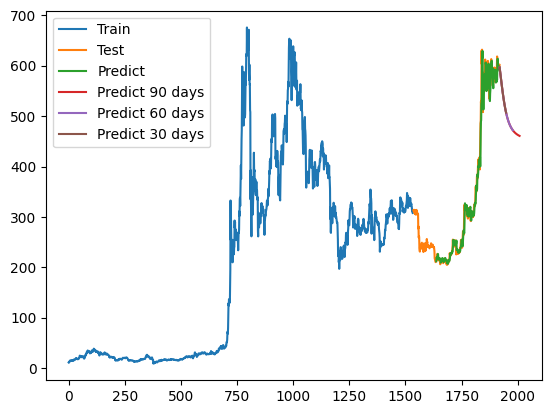

In [156]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [158]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [159]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [160]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [161]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [162]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [163]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [164]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [165]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 38ms/step - loss: 0.0499 - val_loss: 0.0265
Epoch 2/100
26/26 [==============================] - 1s 26ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 3/100
26/26 [==============================] - 1s 27ms/step - loss: 8.3847e-04 - val_loss: 0.0023
Epoch 4/100
26/26 [==============================] - 1s 27ms/step - loss: 6.3081e-04 - val_loss: 0.0014
Epoch 5/100
26/26 [==============================] - 1s 27ms/step - loss: 5.8815e-04 - val_loss: 0.0013
Epoch 6/100
26/26 [==============================] - 1s 26ms/step - loss: 5.5793e-04 - val_loss: 0.0013
Epoch 7/100
26/26 [==============================] - 1s 26ms/step - loss: 5.2752e-04 - val_loss: 0.0012
Epoch 8/100
26/26 [==============================] - 1s 26ms/step - loss: 5.1556e-04 - val_loss: 0.0012
Epoch 9/100
26/26 [==============================] - 1s 26ms/step - loss: 4.9341e-04 - val_loss: 0.0012
Epoch 10/100
26/26 [==============================] - 1s 28ms/step - los

In [166]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [167]:
y_pred=scaler.inverse_transform(y_pred)

In [168]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.2781057295579785
RMSE: 2028.0752583296892
MAE: 1505.237740384615


In [170]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

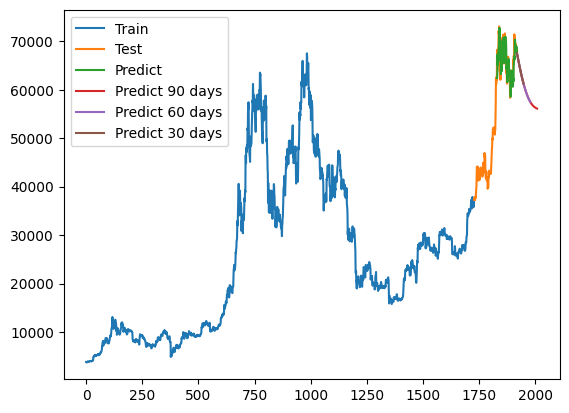

In [171]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [173]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [174]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [175]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [176]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [177]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [178]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [179]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [180]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 38ms/step - loss: 0.0393 - val_loss: 0.0087
Epoch 2/100
26/26 [==============================] - 1s 26ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 3/100
26/26 [==============================] - 1s 26ms/step - loss: 7.7136e-04 - val_loss: 0.0015
Epoch 4/100
26/26 [==============================] - 1s 27ms/step - loss: 6.5789e-04 - val_loss: 0.0017
Epoch 5/100
26/26 [==============================] - 1s 27ms/step - loss: 6.2429e-04 - val_loss: 0.0013
Epoch 6/100
26/26 [==============================] - 1s 26ms/step - loss: 5.7963e-04 - val_loss: 0.0013
Epoch 7/100
26/26 [==============================] - 1s 26ms/step - loss: 5.6062e-04 - val_loss: 0.0012
Epoch 8/100
26/26 [==============================] - 1s 27ms/step - loss: 5.4689e-04 - val_loss: 0.0013
Epoch 9/100
26/26 [==============================] - 1s 27ms/step - loss: 5.3962e-04 - val_loss: 0.0011
Epoch 10/100
26/26 [==============================] - 1s 26ms/step - los

In [181]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 0s/step


In [182]:
y_pred=scaler.inverse_transform(y_pred)

In [183]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.6555683640491523
RMSE: 129.2883496502879
MAE: 89.99575581644915


In [185]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

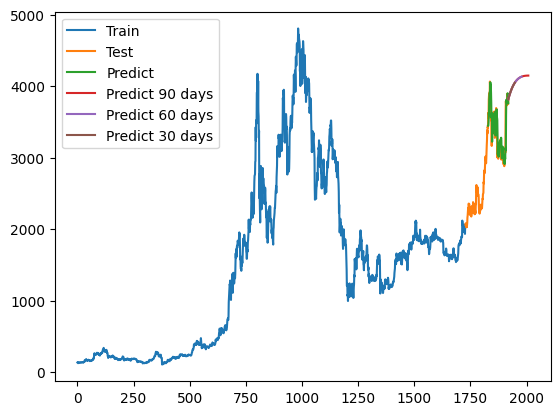

In [186]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [188]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [189]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [190]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [191]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [192]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [193]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [194]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [195]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 3s 38ms/step - loss: 0.0634 - val_loss: 0.0099
Epoch 2/100
26/26 [==============================] - 1s 26ms/step - loss: 0.0064 - val_loss: 0.0021
Epoch 3/100
26/26 [==============================] - 1s 27ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 4/100
26/26 [==============================] - 1s 27ms/step - loss: 9.7951e-04 - val_loss: 0.0019
Epoch 5/100
26/26 [==============================] - 1s 27ms/step - loss: 9.0464e-04 - val_loss: 0.0019
Epoch 6/100
26/26 [==============================] - 1s 26ms/step - loss: 8.4298e-04 - val_loss: 0.0021
Epoch 7/100
26/26 [==============================] - 1s 26ms/step - loss: 8.1785e-04 - val_loss: 0.0017
Epoch 8/100
26/26 [==============================] - 1s 26ms/step - loss: 8.0037e-04 - val_loss: 0.0016
Epoch 9/100
26/26 [==============================] - 1s 26ms/step - loss: 7.4470e-04 - val_loss: 0.0016
Epoch 10/100
26/26 [==============================] - 1s 27ms/step - loss: 7

In [196]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [197]:
y_pred=scaler.inverse_transform(y_pred)

In [198]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.416089121257293
RMSE: 20.143857816578887
MAE: 13.54937576461624


In [200]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

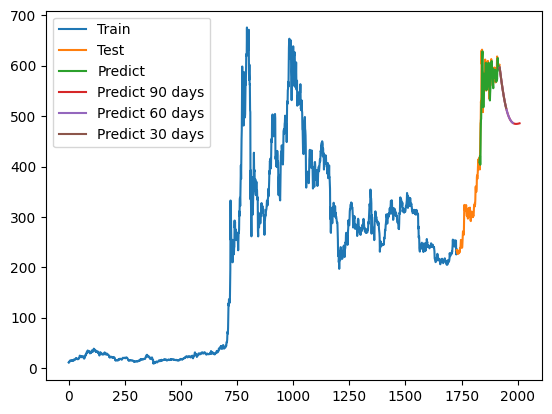

In [201]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()